In [1]:
"""""
Тема: Злиття датафреймів, агрегування даних та візуалізація даних
Мета: Вивчення функцій Pandas для злиття, агрегування та візуалізації даних.

2. Завдання:

В цій лабораторній роботі потрібно використовувати методи Pandas для злиття та агрегування, використовувати атрибути loc,
iloc та слайсинг. НЕ використовувати спискові включення та інші методи ітерування всередині структур даних (для завдань 1-14)

1. Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення 
та виробництва відновлюваної електроенергії, і ввести їх в DataFrame. Майте на увазі, що це файл Excel, а не .csv.
Також необхідно НЕ ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних. Перші два стовпці непотрібні,
тому їх необхідно виключити із датафрейму, а також поміняти мітки стовпців так, щоб вони були такими:
['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable]
"""""

import pandas as pd

file_path = "En_In.xls"
data = pd.read_excel(file_path, skiprows=range(1,18), skipfooter=38, usecols="C:F")
data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


In [ ]:
""""
2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані
(наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN.
""""

In [2]:
import pandas as pd
import numpy as np

file_path = "En_In.xls"
data = pd.read_excel(file_path, skiprows=range(1, 18), skipfooter=38, usecols="C:F")
data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

data['Energy Supply'] = data['Energy Supply'].replace('.....', np.nan)  
data['Energy Supply'] = data['Energy Supply'].replace(r'[^\d.]', '', regex=True) 
data['Energy Supply'] = pd.to_numeric(data['Energy Supply'], errors='coerce')

data['Energy Supply'] = data['Energy Supply'] * 1_000_000

data

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26,0.000000
224,Yemen,3.440000e+08,13,0.000000
225,Zambia,4.000000e+08,26,99.714670


In [ ]:
""""
3. Перейменуйте наступний список країн:
"Republic of Korea": "South Korea",
"United States of America": "United States", 
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
""""

In [3]:
country_renames = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

data['Country'] = data['Country'].replace(country_renames, regex=True)
renamed_countries = data[data['Country'].isin(country_renames.values())]
renamed_countries

,Country,Energy Supply,Energy Supply per Capita,% Renewable
164,South Korea,1.100700e+10,221,2.279353


In [ ]:
""""
4. Існує також декілька країн, що мають в назві цифри та/або дужки.
Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)'
повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.
""""

In [4]:
import re

data['Country'] = data['Country'].str.replace(r'\d+', '', regex=True)
data['Country'] = data['Country'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)

data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Hong Kong',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       "Democratic People's South Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Domi

In [ ]:
""""
Очікуваний вивід для завдань 1-4.
""""

In [5]:
data.loc[data['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


In [ ]:
""""
5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані
Світового банку про ВВП країн від 1960 до 2015 року.
Обов’язково не включайте заголовок до датафрейму і перейменуйте
наступний список країн:
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
Очікуваний вивід для завдання 5 (показані тільки 11 стовпчиків):
""""

In [6]:
GDP_DATA = pd.read_csv("gpd.csv", skiprows=4)

gdp_country_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
GDP_DATA['Country Name'] = GDP_DATA['Country Name'].replace(gdp_country_renames)

In [7]:
GDP_DATA.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10


In [ ]:
""""
6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі
їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій.
""""

In [8]:
scimago_data = pd.read_excel("scimagojr.xlsx")

scimago_data

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


In [ ]:
""""
7. Приєднайте три набори даних із завдань 1-6 до нового набору даних
(використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і
лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають бути ['Rank', 'Documents', 'Citable documents',
'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%
Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.
""""

In [9]:
scimago_data.rename(columns={'Country Name': 'Country'}, inplace=True)
data.rename(columns={'Country Name': 'Country'}, inplace=True)
GDP_DATA.rename(columns={'Country Name': 'Country'}, inplace=True)

top15_scimago = scimago_data.loc[scimago_data['Rank'] <= 15]

top15_scimago = top15_scimago.set_index('Country').loc[:, ['Rank', 'Documents', 'Citable documents', 'Citations', 
                                                           'Self-citations', 'Citations per document', 'H index']]

gdp_last_10_years = GDP_DATA.set_index('Country').loc[:, '2006':'2015']

merged_data = pd.merge(top15_scimago, data.set_index('Country'), left_index=True, right_index=True)

final_data = pd.merge(merged_data, gdp_last_10_years, left_index=True, right_index=True)

print(final_data.shape)

final_data.reset_index(inplace=True)  
final_data.set_index('Country', inplace=True)  
print(final_data)

(15, 20)
                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13 

In [ ]:
""""
Завдання 8 – 14 слід розв’язувати за допомогою датафрейму із завдання 7.
8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.
Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній ВВП, відсортований за спаданням.
""""

In [10]:
def calculate_average_gdp(df):
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    
    average_gdp = df[gdp_columns].mean(axis=1)
    
    sorted_gdp = average_gdp.sort_values(ascending=False)
    
    return sorted_gdp

In [11]:
calculate_average_gdp(final_data)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [ ]:
""""
9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.
Ця функція повинна повертати кортеж із назвою країни та значенням, на яке змінився ВВП.
""""

In [12]:
def gdp_change_for_5th_country(dataframe):
    """
    Визначає зміну ВВП за останні 10 років для країни з 5-м найбільшим середнім ВВП.
    
    Parameters:
        dataframe (pd.DataFrame): DataFrame із завдання 7.
    
    Returns:
        tuple: Назва країни та зміна ВВП.
    """
    average_gdp = dataframe.loc[:, '2006':'2015'].mean(axis=1)
    
    sorted_gdp = average_gdp.sort_values(ascending=False)
    
    country_5th = sorted_gdp.index[4]
    
    gdp_change = dataframe.loc[country_5th, '2015'] - dataframe.loc[country_5th, '2006']
    
    return (country_5th, gdp_change)

result = gdp_change_for_5th_country(final_data)
print("Країна з 5-м середнім ВВП та зміна ВВП:", result)

Країна з 5-м середнім ВВП та зміна ВВП: ('France', 153345695364.24023)


In [ ]:
""""
10. Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable)
та який саме відсоток. Ця функція повинна повертати кортеж із назвою країни та відсотком.
""""

In [13]:
def country_with_max_renewable(dataframe):

    max_renewable = dataframe['% Renewable'].idxmax()
    max_percentage = dataframe.loc[max_renewable, '% Renewable']
    
    return (max_renewable, max_percentage)

result = country_with_max_renewable(final_data)
print("Країна з максимальним % Renewable:", result)

Країна з максимальним % Renewable: ('Brazil', 69.64803)


In [ ]:
""""
11. Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення
енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією
оцінкою? Ця функція повинна повертати кортеж із назвою країни та населенням
""""

In [14]:
def population_and_6th_country(dataframe):
    dataframe['Population'] = dataframe['Energy Supply'] / dataframe['Energy Supply per Capita']
    
    sorted_df = dataframe.sort_values(by='Population', ascending=False)
    
    sixth_country = sorted_df.index[5]
    population = sorted_df.loc[sixth_country, 'Population']
    
    return (sixth_country, population)

result = population_and_6th_country(final_data)
print("Шоста країна за чисельністю населення:", result)

Шоста країна за чисельністю населення: ('Japan', 127409395.97315437)


In [ ]:
""""
12. Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю
цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr ()
(кореляція Пірсона). Ця функція повинна повертати одне число
""""

In [15]:
def calculate_correlation(df):
    if 'Population' not in df.columns:
        df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    
    df['Citations per Capita'] = df['Citations'] / df['Population']
    
    df['Citations per Capita'] = pd.to_numeric(df['Citations per Capita'], errors='coerce')
    df['Energy Supply per Capita'] = pd.to_numeric(df['Energy Supply per Capita'], errors='coerce')
    
    df = df.dropna(subset=['Citations per Capita', 'Energy Supply per Capita'])
    
    correlation = df['Citations per Capita'].corr(df['Energy Supply per Capita'])
    
    return correlation

correlation_result = calculate_correlation(final_data)

print("Кореляція між цитуваннями на душу населення та енергозабезпеченням на душу населення:", correlation_result)

Кореляція між цитуваннями на душу населення та енергозабезпеченням на душу населення: 0.6668248468590926


In [ ]:
""""
13. Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або
вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани. Ця функція повинна повертати Series,
індексом якого є назва країни, відсортована у порядку зростання Rank


ContinentDict = {'China':'Asia',
'United States':'North America',
'Japan':'Asia',
'United Kingdom':'Europe',
'Russian Federation':'Europe',
'Canada':'North America',
'Germany':'Europe',
'India':'Asia',
'France':'Europe',
'South Korea':'Asia',
'Italy':'Europe',
'Spain':'Europe',
'Iran':'Asia',

'Australia':'Australia',
'Brazil':'South America'}

Ця функція повинна повертати DataFrame з індексом, що має ім’я Continent
['Asia', 'Australia', 'Europe', 'North America', 'South America'] та стовпцями
['size', 'sum', 'mean', 'std '].
""""

In [16]:
def renewable_above_median(dataframe):
    median_renewable = dataframe['% Renewable'].median()
    
    dataframe['Above Median Renewable'] = (dataframe['% Renewable'] >= median_renewable).astype(int)
    
    result = dataframe.sort_values('Rank')['Above Median Renewable']
    return result

result = renewable_above_median(final_data)

print(result)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Above Median Renewable, dtype: int32


In [ ]:
""""
14. Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір
вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості
населення для кожної країни.
""""

In [17]:
def population_stats_by_continent(dataframe):
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }
    
    dataframe['Continent'] = dataframe.index.map(ContinentDict)
    
    grouped = dataframe.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    
    return grouped

In [18]:
final_data['Population Estimate'] = final_data['Energy Supply'] / final_data['Energy Supply per Capita']

continent_stats = population_stats_by_continent(final_data)
print(continent_stats)

               size           sum          mean           std
Continent                                                    
Asia              5  2.898666e+09  5.797333e+08  6.790979e+08
Australia         1  2.331602e+07  2.331602e+07           NaN
Europe            6  4.579297e+08  7.632161e+07  3.464767e+07
North America     2  3.528552e+08  1.764276e+08  1.996696e+08
South America     1  2.059153e+08  2.059153e+08           NaN


In [ ]:
""""
15. Створіть бульбашкову діаграму, що відображає залежність % поновлюван
их джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від
повідає ВВП країн 2015 року, а колір відповідає континенту.
""""

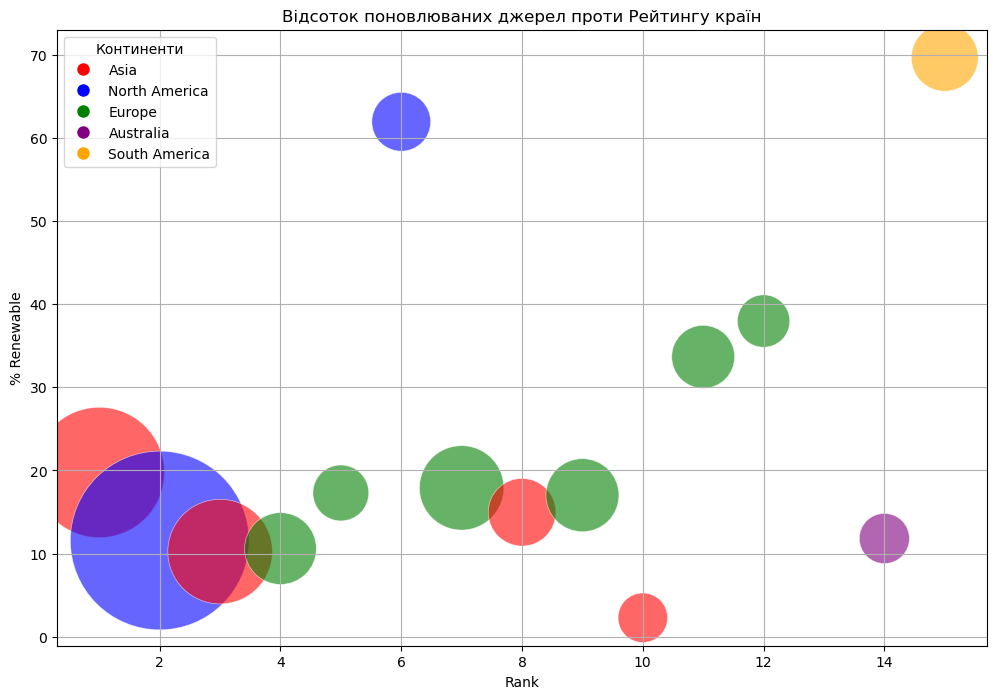

In [26]:
import matplotlib.pyplot as plt

def bubble_chart(dataframe):
    """
    Побудова бульбашкової діаграми:
    - % Renewable (ось Y) проти Rank (ось X).
    - Розмір бульбашки: ВВП 2015 року.
    - Колір: континент.
    """
    # Словник кольорів для континентів
    continent_colors = {
        'Asia': 'red',
        'North America': 'blue',
        'Europe': 'green',
        'Australia': 'purple',
        'South America': 'orange'
    }
    
    x = dataframe['Rank']
    y = dataframe['% Renewable']
    sizes = dataframe['2015'] / 1e12  # Нормалізація для масштабів розміру
    colors = dataframe['Continent'].map(continent_colors)
    
    # Побудова діаграми
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x, y, s=sizes * 1000, c=colors, alpha=0.6, edgecolors="w", linewidth=0.5)
    
    # Додаємо підписи
    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    plt.title('Відсоток поновлюваних джерел проти Рейтингу країн')
    plt.grid(True)
    
    # Додаємо легенду
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=continent, markerfacecolor=color, markersize=10)
        for continent, color in continent_colors.items()
    ]
    plt.legend(handles=legend_elements, title="Континенти", loc='upper left')
    
    # Відображення діаграми
    plt.show()

# Виклик функції для побудови діаграми
bubble_chart(final_data)